# P-219- Hourly Energy Consumption Forecast 
    The hourly power consumption data comes from PJM's website and are in megawatts (MW).

# Import Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read the DataSet

In [2]:
df = pd.read_excel("PJMW_MW_Hourly.xlsx")
df

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077
1,2002-12-31 02:00:00,4939
2,2002-12-31 03:00:00,4885
3,2002-12-31 04:00:00,4857
4,2002-12-31 05:00:00,4930
...,...,...
143201,2018-01-01 20:00:00,8401
143202,2018-01-01 21:00:00,8373
143203,2018-01-01 22:00:00,8238
143204,2018-01-01 23:00:00,7958


In [35]:
df.head()

,Datetime,PJMW_MW,New_Date,New_Time,Year
0,2002-12-31 01:00:00,5077,2002-12-31,01:00:00,2002
1,2002-12-31 02:00:00,4939,2002-12-31,02:00:00,2002
2,2002-12-31 03:00:00,4885,2002-12-31,03:00:00,2002
3,2002-12-31 04:00:00,4857,2002-12-31,04:00:00,2002
4,2002-12-31 05:00:00,4930,2002-12-31,05:00:00,2002


In [38]:
df.tail()

,Datetime,PJMW_MW,New_Date,New_Time,Year
143201,2018-01-01 20:00:00,8401,2018-01-01,20:00:00,2018
143202,2018-01-01 21:00:00,8373,2018-01-01,21:00:00,2018
143203,2018-01-01 22:00:00,8238,2018-01-01,22:00:00,2018
143204,2018-01-01 23:00:00,7958,2018-01-01,23:00:00,2018
143205,2018-01-02 00:00:00,7691,2018-01-02,00:00:00,2018


In [3]:
df.describe()

,PJMW_MW
count,143206.000000
mean,5602.375089
std,979.142872
min,487.000000
25%,4907.000000
50%,5530.000000
75%,6252.000000
max,9594.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143206 entries, 0 to 143205
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  143206 non-null  datetime64[ns]
 1   PJMW_MW   143206 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.2 MB


# Seperate Data and Time

In [5]:
df["New_Date"] = pd.to_datetime(df["Datetime"]).dt.date
df["New_Time"] = pd.to_datetime(df["Datetime"]).dt.time

In [6]:
df1= df
df1

,Datetime,PJMW_MW,New_Date,New_Time
0,2002-12-31 01:00:00,5077,2002-12-31,01:00:00
1,2002-12-31 02:00:00,4939,2002-12-31,02:00:00
2,2002-12-31 03:00:00,4885,2002-12-31,03:00:00
3,2002-12-31 04:00:00,4857,2002-12-31,04:00:00
4,2002-12-31 05:00:00,4930,2002-12-31,05:00:00
...,...,...,...,...
143201,2018-01-01 20:00:00,8401,2018-01-01,20:00:00
143202,2018-01-01 21:00:00,8373,2018-01-01,21:00:00
143203,2018-01-01 22:00:00,8238,2018-01-01,22:00:00
143204,2018-01-01 23:00:00,7958,2018-01-01,23:00:00


# When was the higest Energy Consumption and which Year

# Maximum

In [7]:
df1[df1["PJMW_MW"]== df["PJMW_MW"].max()]

,Datetime,PJMW_MW,New_Date,New_Time
119310,2015-02-20 08:00:00,9594,2015-02-20,08:00:00


# Minimum

In [8]:
df1[df1["PJMW_MW"]== df["PJMW_MW"].min()]

,Datetime,PJMW_MW,New_Date,New_Time
11828,2003-05-29,487,2003-05-29,00:00:00


# Check for duplicate value

In [9]:
df[df.duplicated()]

,Datetime,PJMW_MW,New_Date,New_Time


# Check NA

In [10]:
df.isna().sum()

Datetime    0
PJMW_MW     0
New_Date    0
New_Time    0
dtype: int64

# Data Types

In [11]:
df.dtypes

Datetime    datetime64[ns]
PJMW_MW              int64
New_Date            object
New_Time            object
dtype: object

# Outlier detection

In [12]:
plt.rcParams['figure.figsize'] =(10,5)
plt.rcParams['figure.dpi']=250

sns.set_style('darkgrid')

{'whiskers': [<matplotlib.lines.Line2D at 0x1b29ab08070>,
 'caps': [<matplotlib.lines.Line2D at 0x1b29ab08610>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1b29a8d6c70>],
 'medians': [<matplotlib.lines.Line2D at 0x1b29ab08bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b29ab20190>],
 'means': [<matplotlib.lines.Line2D at 0x1b29ab08e80>]}

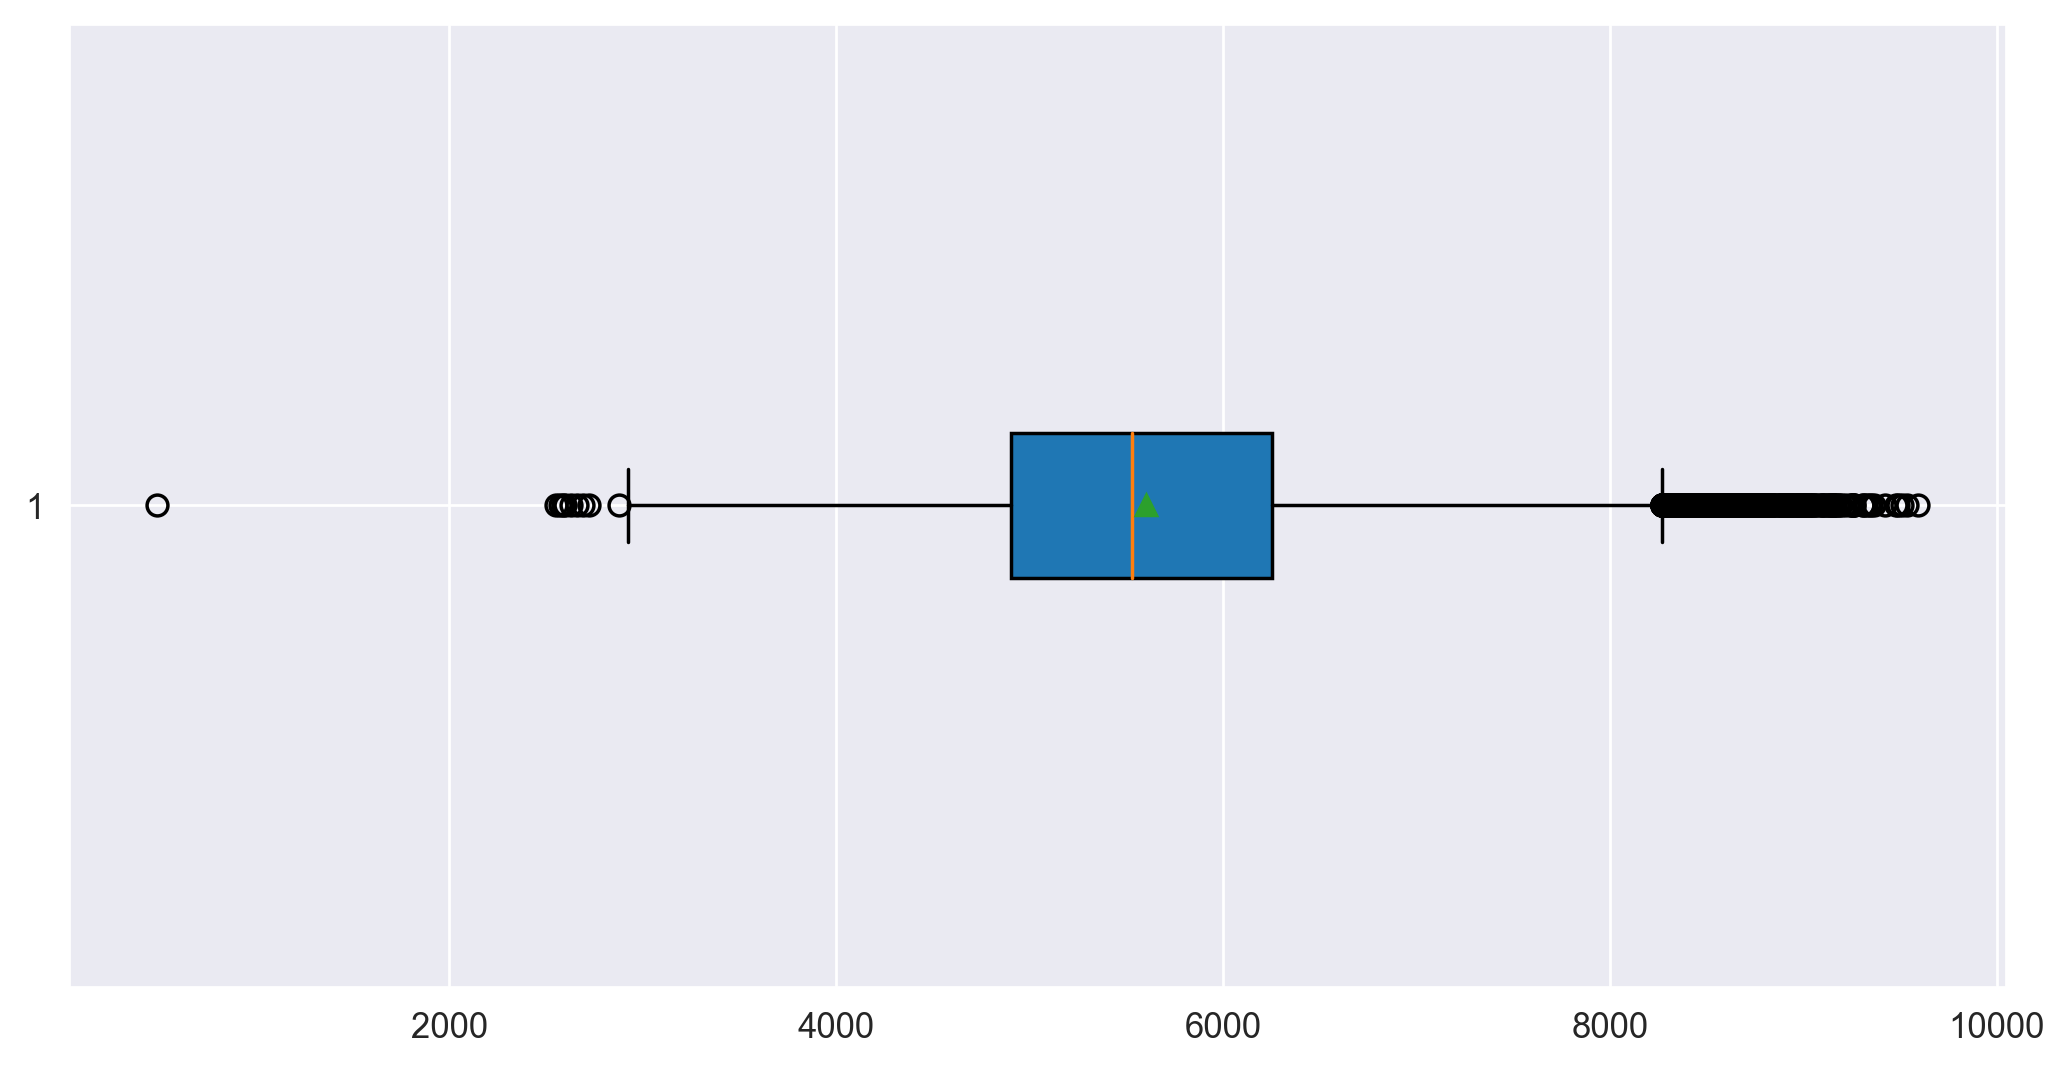

In [13]:
plt.boxplot(df['PJMW_MW'], vert=False, patch_artist=True, showmeans=True)

# Plot and Data visualization

<AxesSubplot:xlabel='PJMW_MW', ylabel='Density'>

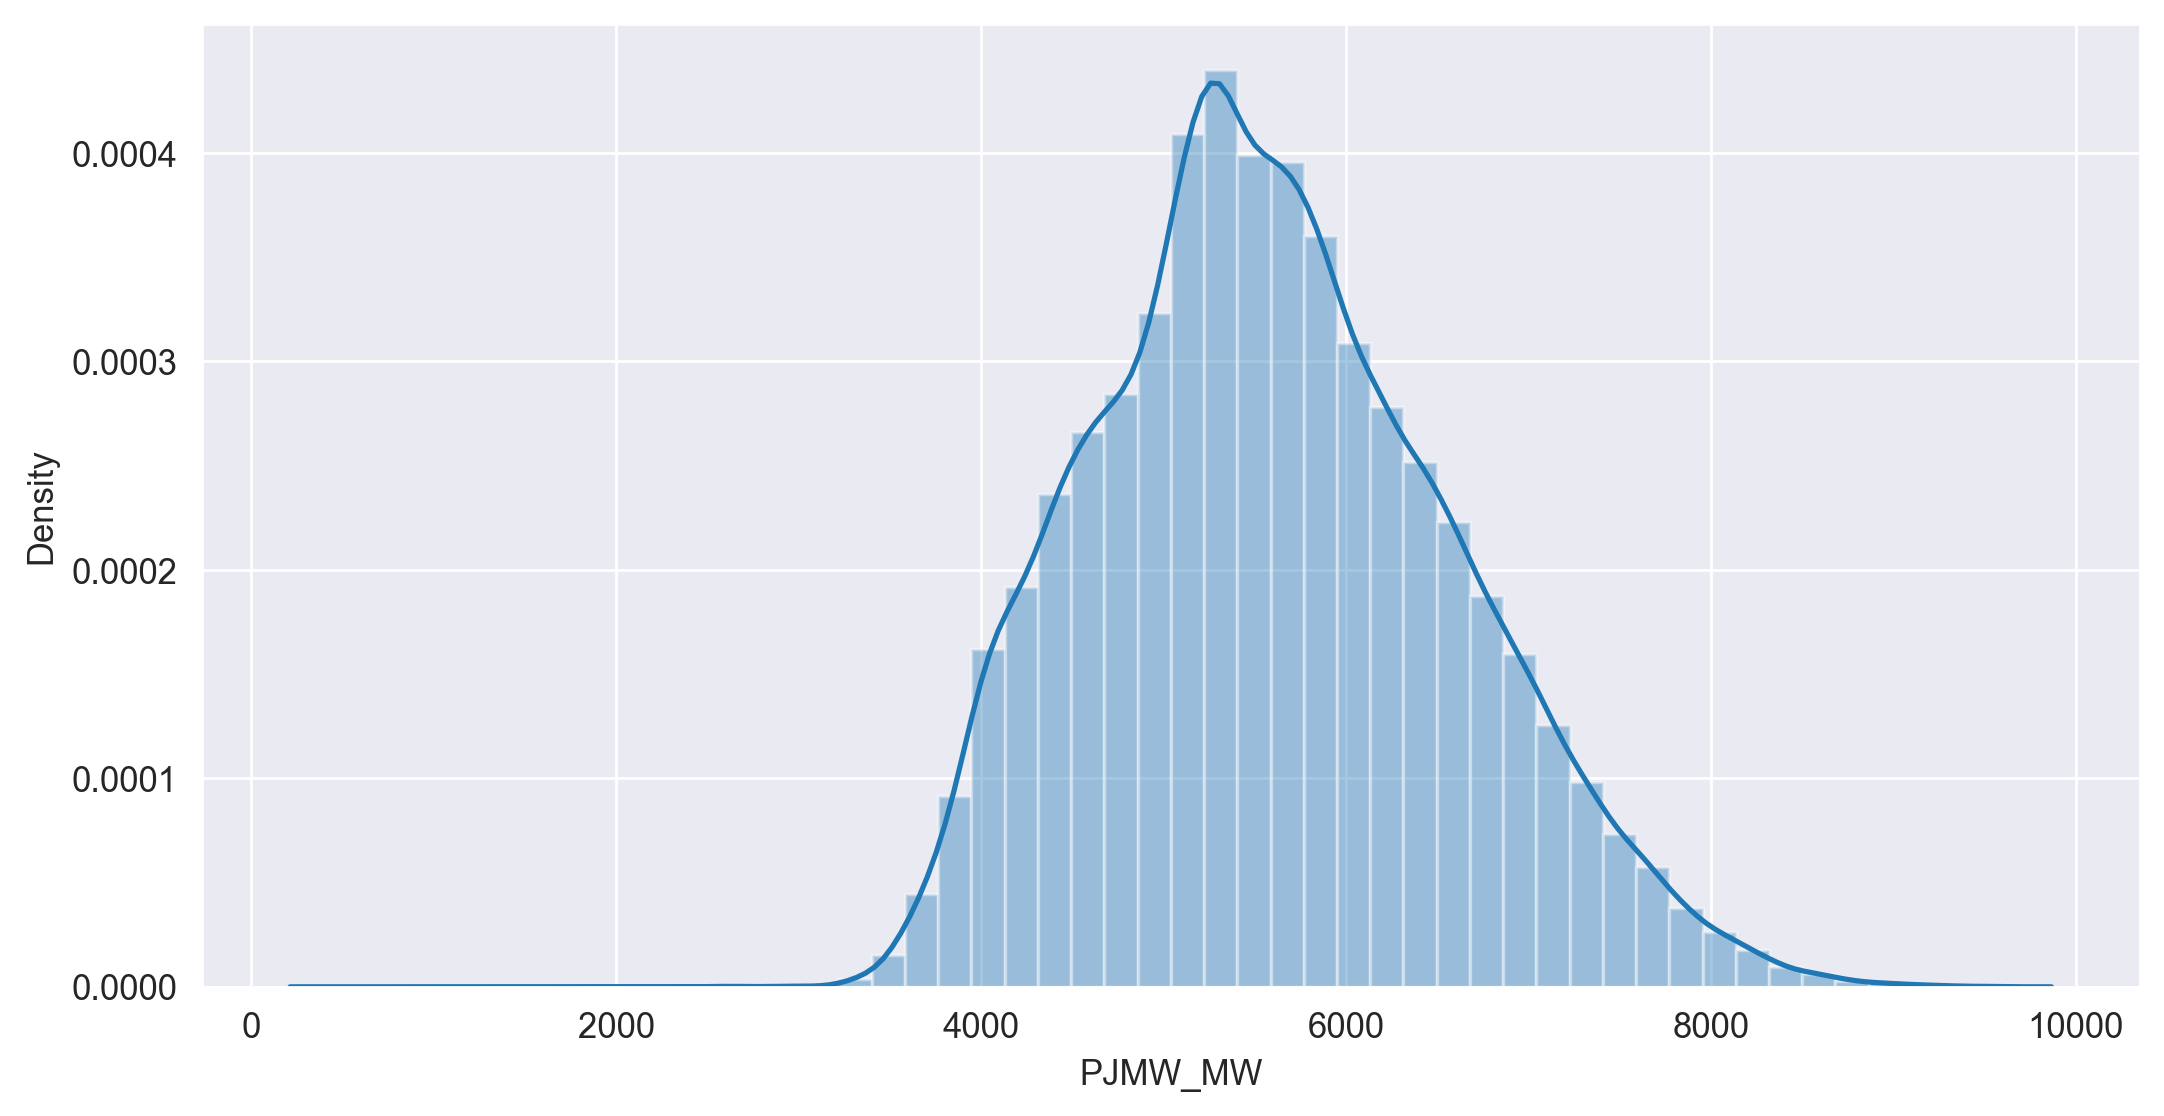

In [14]:
sns.distplot( df1["PJMW_MW"] )

# Extract Date and Time

In [15]:
df1.head(2)

,Datetime,PJMW_MW,New_Date,New_Time
0,2002-12-31 01:00:00,5077,2002-12-31,01:00:00
1,2002-12-31 02:00:00,4939,2002-12-31,02:00:00


In [16]:
df1["Year"]= pd.DatetimeIndex(df['New_Date']).year

In [17]:
df1.head(2)

,Datetime,PJMW_MW,New_Date,New_Time,Year
0,2002-12-31 01:00:00,5077,2002-12-31,01:00:00,2002
1,2002-12-31 02:00:00,4939,2002-12-31,02:00:00,2002


# Check how many Years are Unique

In [18]:
df1["Year"].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

# Show the Relationship of Energy vs Year

<AxesSubplot:xlabel='Year', ylabel='PJMW_MW'>

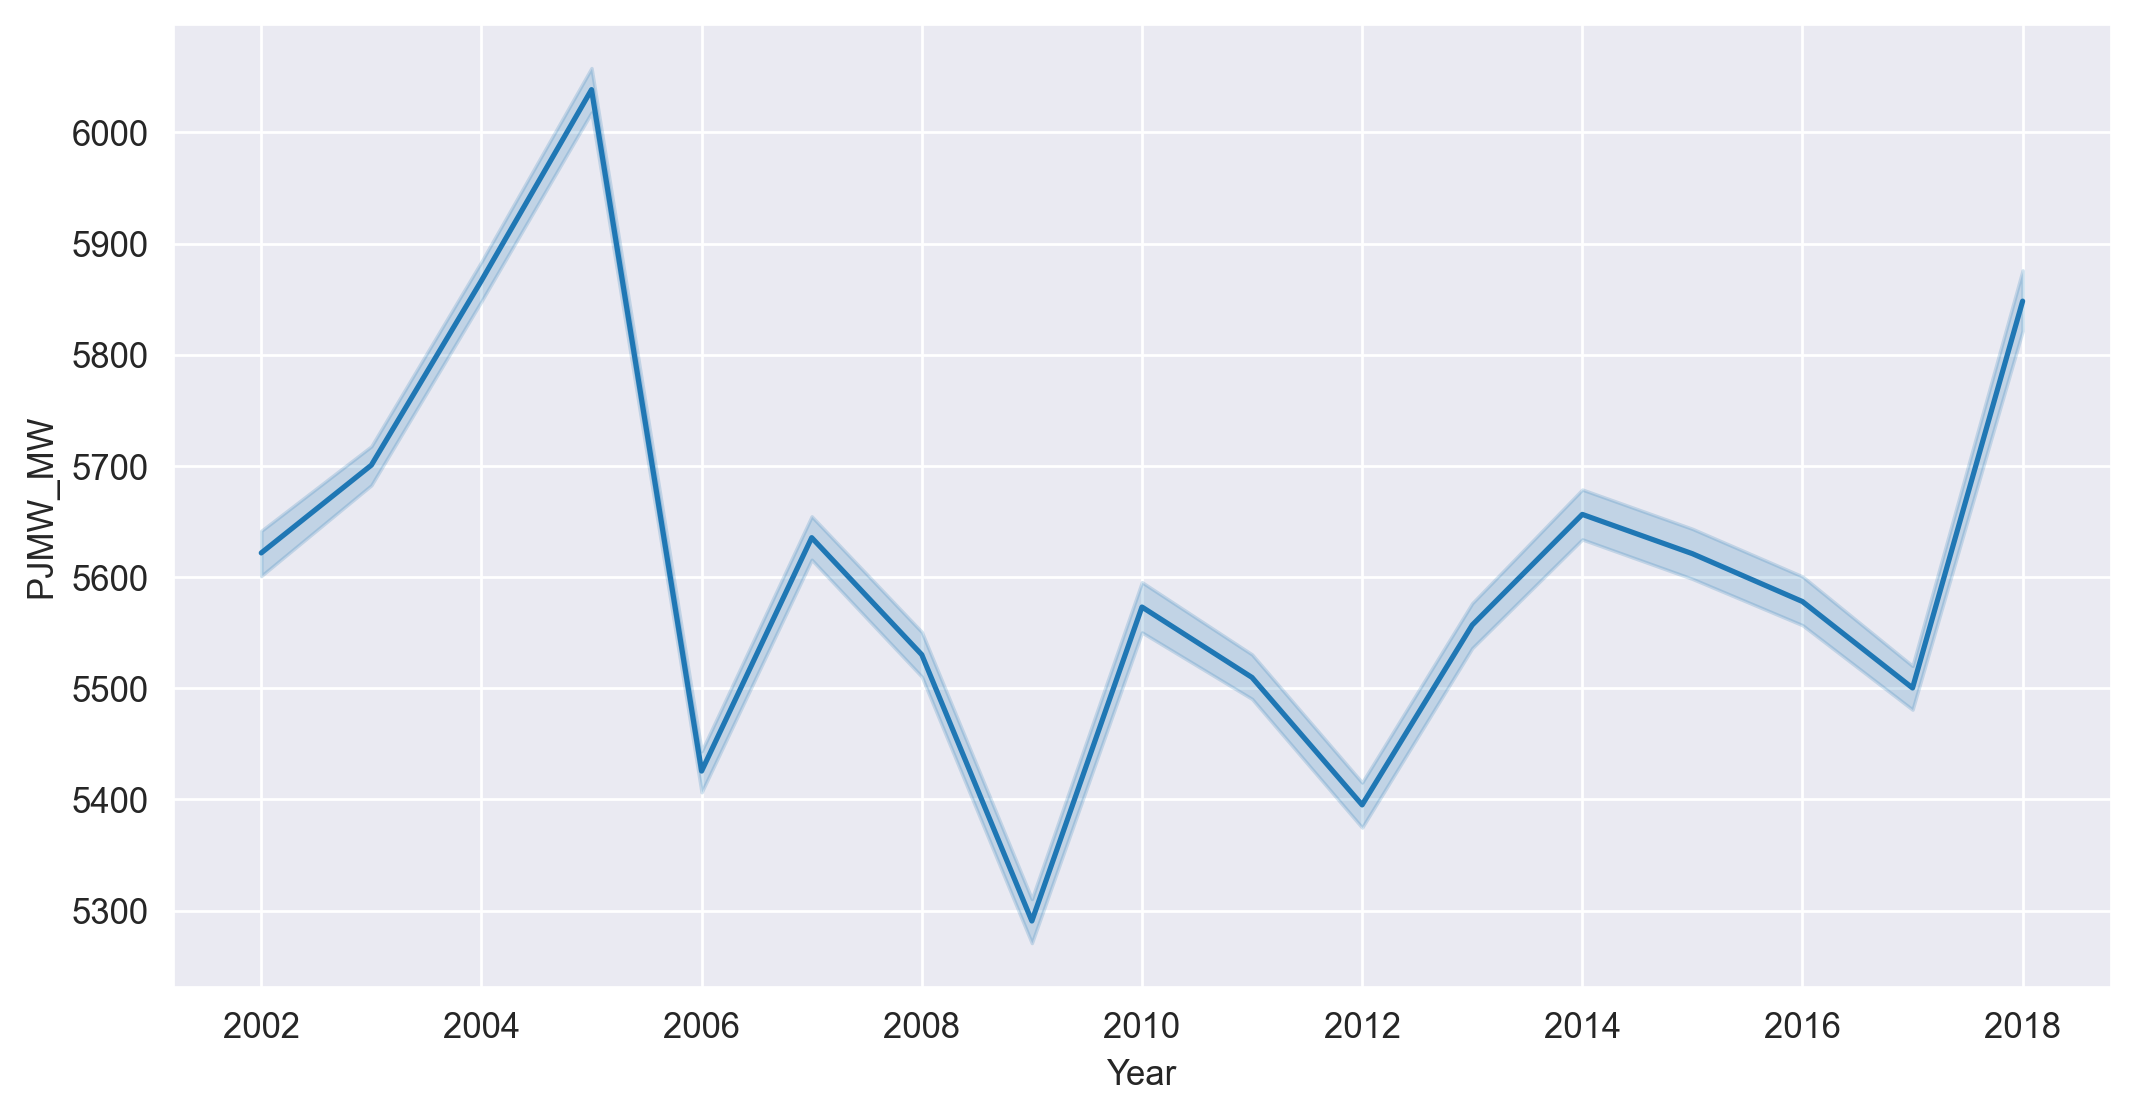

In [19]:
sns.lineplot(x=df1["Year"], y=df1["PJMW_MW"], data=df1)

# Regression

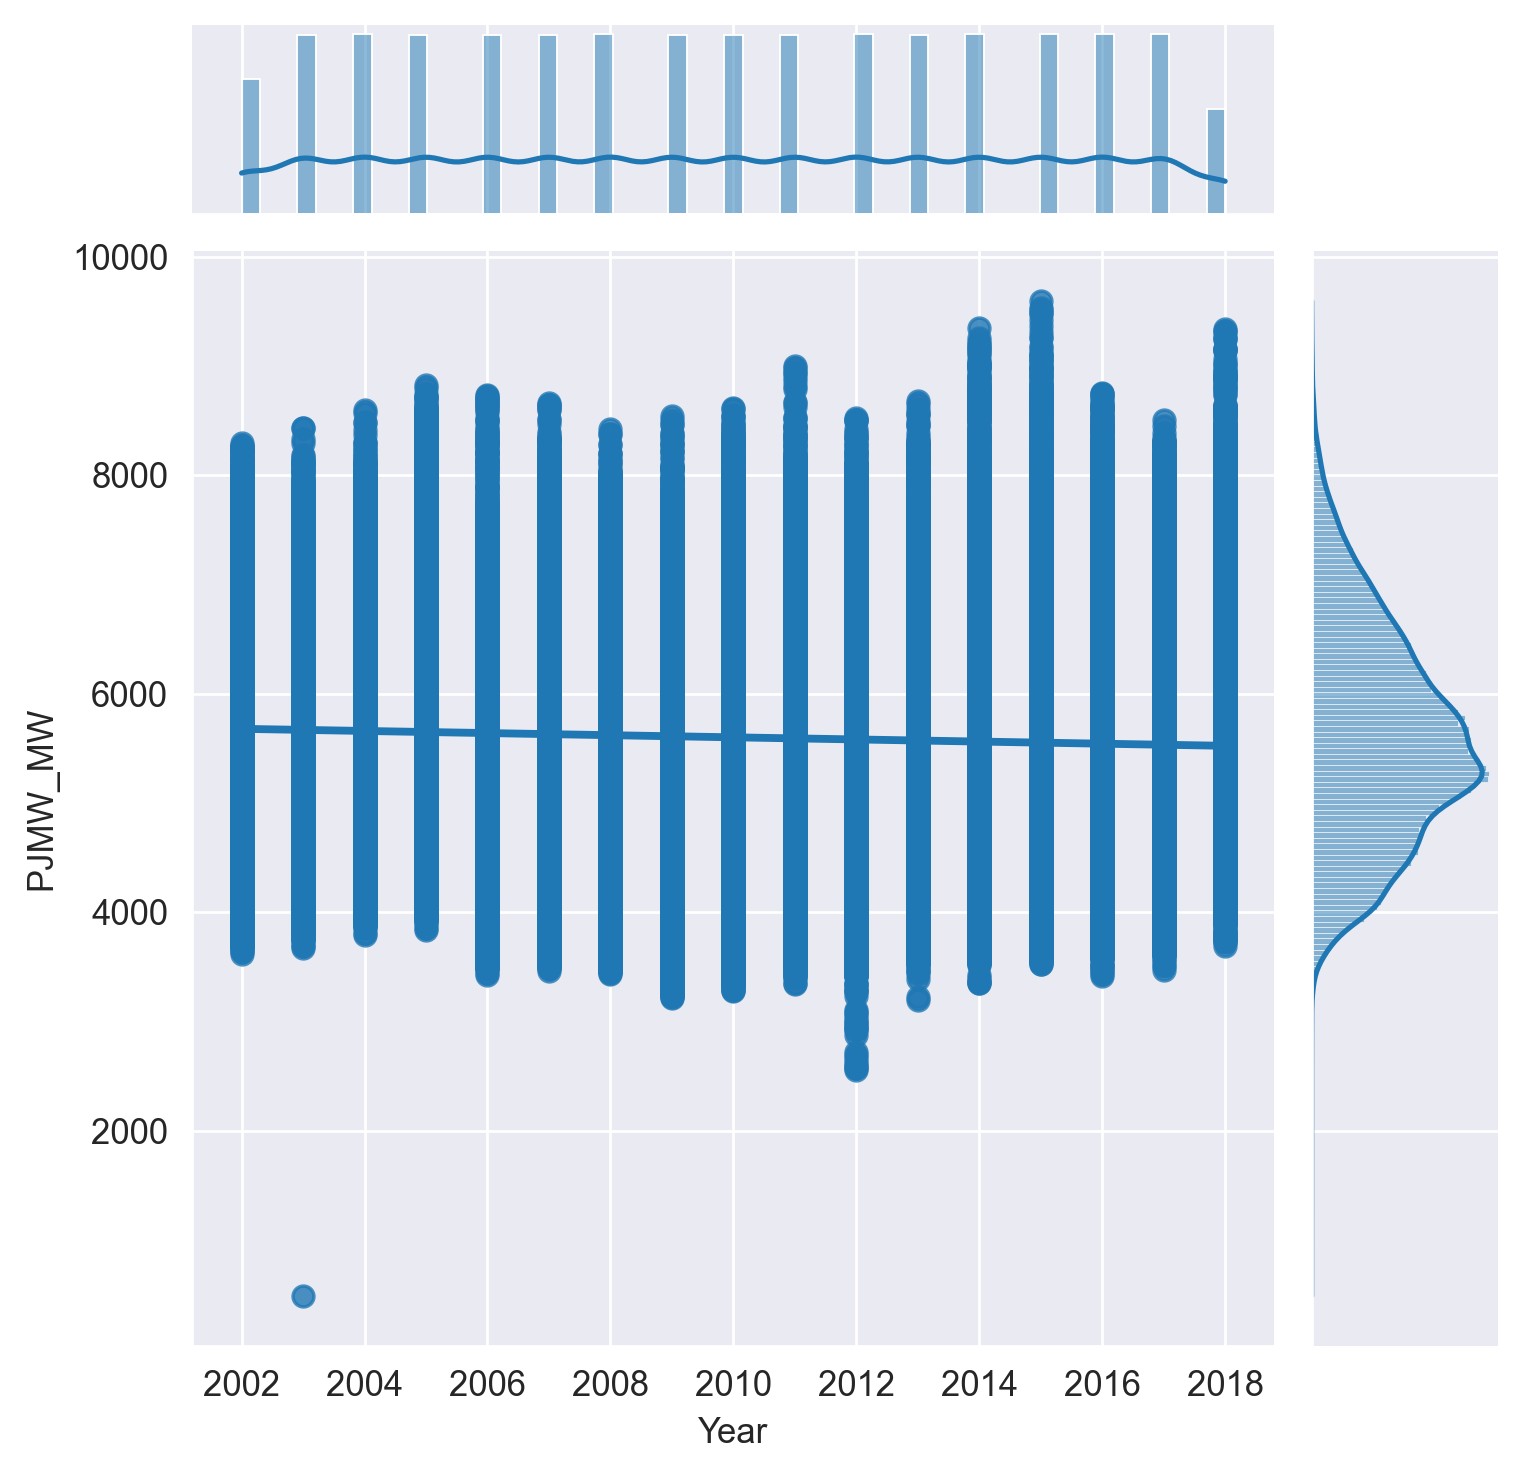

In [29]:
sns.jointplot(x=df1["Year"],
             y=df1["PJMW_MW"],
             data=df1,
             kind="reg")